## Visualizing Semiconductor Stocks

In [3]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import time

In [5]:
def download_semiconductor_stocks(start_date='2020-01-01', end_date=None):
    """
    Download stock data for major semiconductor companies and create a DataFrame
    similar to companies.csv format.
    
    Args:
        start_date (str): Start date in 'YYYY-MM-DD' format
        end_date (str): End date in 'YYYY-MM-DD' format (default: today)
    
    Returns:
        pd.DataFrame: Combined stock data for all semiconductor companies
    """
    
    # Top 10 semiconductor companies tickers
    semiconductor_tickers = [
        'NVDA',  # NVIDIA
        'AMD',   # Advanced Micro Devices
        'INTC',  # Intel
        'TSM',   # Taiwan Semiconductor
        'AVGO',  # Broadcom
        'QCOM',  # Qualcomm
        'TXN',   # Texas Instruments
        'AMAT',  # Applied Materials
        'MU',    # Micron Technology
        'ADI'    # Analog Devices
    ]
    
    # Set end date to today if not provided
    if end_date is None:
        end_date = datetime.now().strftime('%Y-%m-%d')
    
    print(f"Downloading semiconductor stock data from {start_date} to {end_date}")
    print(f"Total tickers: {len(semiconductor_tickers)}")
    
    all_data = []
    failed_tickers = []
    
    for i, ticker in enumerate(semiconductor_tickers, 1):
        try:
            print(f"Downloading {ticker} ({i}/{len(semiconductor_tickers)})...")
            
            # Download stock data
            stock = yf.Ticker(ticker)
            hist = stock.history(start=start_date, end=end_date)
            
            if hist.empty:
                print(f"  Warning: No data found for {ticker}")
                failed_tickers.append(ticker)
                continue
            
            # Reset index to get date as a column
            hist.reset_index(inplace=True)
            
            # Rename columns to match companies.csv format
            hist.rename(columns={
                'Date': 'date',
                'Open': 'open',
                'High': 'high',
                'Low': 'low',
                'Close': 'close',
                'Volume': 'volume'
            }, inplace=True)
            
            # Add adj_close column (using Close if Adj Close not available)
            if 'Adj Close' in hist.columns:
                hist['adj_close'] = hist['Adj Close']
                hist.drop('Adj Close', axis=1, inplace=True)
            else:
                hist['adj_close'] = hist['close']
            
            # Add company ticker column
            hist['company_ticker'] = ticker
            
            # Convert date to string format
            hist['date'] = hist['date'].dt.strftime('%Y-%m-%d')
            
            # Select and reorder columns to match companies.csv
            hist = hist[['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume', 'company_ticker']]
            
            # Remove any remaining unnecessary columns
            if 'Dividends' in hist.columns:
                hist.drop('Dividends', axis=1, inplace=True)
            if 'Stock Splits' in hist.columns:
                hist.drop('Stock Splits', axis=1, inplace=True)
            
            all_data.append(hist)
            print(f"  Successfully downloaded {len(hist)} records")
            
            # Small delay to be respectful to the API
            time.sleep(0.1)
            
        except Exception as e:
            print(f"  Error downloading {ticker}: {str(e)}")
            failed_tickers.append(ticker)
            continue
    
    if not all_data:
        raise ValueError("No data was successfully downloaded for any ticker")
    
    # Combine all data
    combined_df = pd.concat(all_data, ignore_index=True)
    
    # Sort by date and company ticker
    combined_df.sort_values(['date', 'company_ticker'], inplace=True)
    combined_df.reset_index(drop=True, inplace=True)
    
    print(f"\nDownload complete!")
    print(f"Total records: {len(combined_df)}")
    print(f"Date range: {combined_df['date'].min()} to {combined_df['date'].max()}")
    print(f"Companies: {combined_df['company_ticker'].nunique()}")
    
    if failed_tickers:
        print(f"Failed tickers: {failed_tickers}")
    
    return combined_df

def save_to_csv(df, filename='semiconductor_companies.csv'):
    """Save the DataFrame to CSV file"""
    df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

# Main execution
if __name__ == "__main__":
    try:
        # Download data for the last 5 years
        start_date = (datetime.now() - timedelta(days=5*365)).strftime('%Y-%m-%d')
        
        # Download the data
        df = download_semiconductor_stocks(start_date=start_date)
        
        # Save to CSV
        save_to_csv(df)
        
        # Display sample data
        print("\nSample data:")
        print(df.head(10))
        print(f"\nDataFrame shape: {df.shape}")
        print(f"Columns: {list(df.columns)}")
        
    except Exception as e:
        print(f"Error: {str(e)}")

Total tickers: 10
  Successfully downloaded 1254 records
  Successfully downloaded 1254 records
  Successfully downloaded 1254 records
  Successfully downloaded 1254 records
  Successfully downloaded 1254 records
  Successfully downloaded 1254 records
  Successfully downloaded 1254 records
  Successfully downloaded 1254 records
  Successfully downloaded 1254 records
  Successfully downloaded 1254 records

Download complete!
Total records: 12540
Date range: 2020-06-24 to 2025-06-20
Companies: 10
Data saved to semiconductor_companies.csv

Sample data:
         date        open        high         low       close   adj_close  \
0  2020-06-24  111.910132  112.120458  108.480952  109.249092  109.249092   
1  2020-06-24   57.690480   58.225977   56.562106   57.346230   57.346230   
2  2020-06-24   53.939999   54.740002   51.919998   52.389999   52.389999   
3  2020-06-24   27.430885   27.587912   27.014809   27.233049   27.233049   
4  2020-06-24   53.165670   53.317217   52.300969   52.6753

In [7]:
companies = pd.read_csv('semiconductor_companies.csv')

In [9]:
companies.head()

date        open        high         low       close   adj_close  \
0  2020-06-24  111.910132  112.120458  108.480952  109.249092  109.249092   
1  2020-06-24   57.690480   58.225977   56.562106   57.346230   57.346230   
2  2020-06-24   53.939999   54.740002   51.919998   52.389999   52.389999   
3  2020-06-24   27.430885   27.587912   27.014809   27.233049   27.233049   
4  2020-06-24   53.165670   53.317217   52.300969   52.675377   52.675377   

     volume company_ticker  
0   2102900            ADI  
1   7937300           AMAT  
2  53535500            AMD  
3  19096000           AVGO  
4  27764500           INTC

In [11]:
companies.isna().sum()

date              0
open              0
high              0
low               0
close             0
adj_close         0
volume            0
company_ticker    0
dtype: int64

In [13]:
companies.duplicated().sum()

0

In [15]:
companies.shape

(12540, 8)

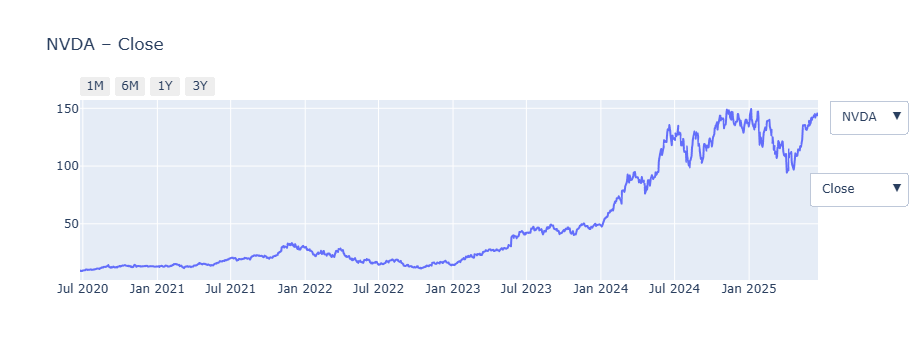

In [18]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Ensure 'date' is in datetime format
companies['date'] = pd.to_datetime(companies['date'])

# --- Set up the list of semiconductor company tickers, column labels, and default selections for the plot ---
tickers = ["NVDA", "AMD", "INTC", "TSM", "AVGO",
           "QCOM", "TXN", "AMAT", "MU", "ADI"]

# OPTIONAL: friendly labels for cleaner dropdown text
col_map = {
    "open":  "Open",  "high": "High", "low": "Low",
    "close": "Close", "adj_close": "Adj Close", "volume": "Volume"
}

default_tkr = "NVDA"
default_col = "close"

# --- Build one trace per company for the default column ---
fig = go.Figure()
for t in tickers:
    sub = companies[companies["company_ticker"] == t]
    trace = px.line(sub, x="date", y=default_col).data[0]
    trace.name = t  # Set the trace name for the legend
    trace.visible = (t == default_tkr)  # OPTIONAL: default company only → cleaner first view
    fig.add_trace(trace)

# --- Dropdown for company selection; updates visible trace only ---
company_buttons = []
for i, t in enumerate(tickers):
    vis = [False] * len(tickers); vis[i] = True
    company_buttons.append({
        'label': t,
        'method': "update",
        'args': [
            {'visible': vis},
            {'title': f"{t} – {col_map[default_col]}"} # OPTIONAL: a dynamic title
        ]
    })

# --- Dropdown for column selection; updates y-data for all traces ---
column_buttons = []
for c_key, c_lbl in col_map.items():
    y_lists = [companies[companies["company_ticker"] == tt][c_key]
               for tt in tickers]
    column_buttons.append({
        'label': c_lbl,
        'method': "update",
        'args': [
            {'y': y_lists},  # Updates y-data for each trace
            {'title': f"{default_tkr} – {c_lbl}"}
        ]
    })

# --- Range-selector buttons for time filtering ---
range_buttons = [
    {'count': 1, 'step': "month", 'stepmode': "backward", 'label': "1M"},
    {'count': 6, 'step': "month", 'stepmode': "backward", 'label': "6M"},
    {'count': 1, 'step': "year",  'stepmode': "backward", 'label': "1Y"},
    {'count': 3, 'step': "year",  'stepmode': "backward", 'label': "3Y"}
]

# --- Update layout with two dropdowns and time buttons ---
fig.update_layout({
    'title': f"{default_tkr} – {col_map[default_col]}",
    'xaxis': {
        'rangeselector': {'buttons': range_buttons},
        'rangeslider':   {'visible': False},
        'type': 'date'
    },
    'updatemenus': [
        {'type': "dropdown", 'direction': 'down',
         'x': 1.12, 'y': 1.00, 'showactive': True,
         'buttons': company_buttons,
         'active': tickers.index(default_tkr)},
        {'type': "dropdown", 'direction': 'down',
         'x': 1.12, 'y': 0.6, 'showactive': True,
         'buttons': column_buttons,
         'active': list(col_map).index(default_col)}
    ], 
    'hovermode': "x unified"  # OPTIONAL: unified tooltip → less clutter
})

fig.show()

In [23]:
fig.write_html("semiconductor_stocks_dashboard.html")
print("Interactive dashboard saved as 'semiconductor_stocks_dashboard.html'")

# 2. Save as static PNG image (requires kaleido: pip install kaleido)
# fig.write_image("semiconductor_stocks_dashboard.png", width=1200, height=800)
# print("Static image saved as 'semiconductor_stocks_dashboard.png'")

# 3. Save as PDF (requires kaleido: pip install kaleido)
# fig.write_image("semiconductor_stocks_dashboard.pdf", width=1200, height=800)
# print("PDF saved as 'semiconductor_stocks_dashboard.pdf'")

# 4. Save as SVG (requires kaleido: pip install kaleido)
# fig.write_image("semiconductor_stocks_dashboard.svg", width=1200, height=800)
# print("SVG saved as 'semiconductor_stocks_dashboard.svg'")

Interactive dashboard saved as 'semiconductor_stocks_dashboard.html'
